# Import necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data.

In [2]:
file_path = 'Melbourne_housing.csv'  
data = pd.read_csv(file_path)

C:\Users\tiend\AppData\Local\Temp\ipykernel_14776\3850827233.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


# Display basic information of the data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

# Display the first 5 rows of the data.

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


# Check the number of missing values in each column.

In [7]:
missing_values = data.isnull().sum()
print(missing_values)

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64


# Overview of descriptive statistics of the data.

In [8]:
data.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34857.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,15551.000000,26881.000000,26881.000000,34854.000000,2.724700e+04
mean,3.031012,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,1965.289885,-37.810634,145.001851,7572.888306,1.050173e+06
std,0.969933,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,37.328178,0.090279,0.120169,4428.090313,6.414671e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,8.500000e+04
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,1940.000000,-37.862950,144.933500,4385.000000,6.350000e+05
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,1970.000000,-37.807600,145.007800,6763.000000,8.700000e+05
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,2000.000000,-37.754100,145.071900,10412.000000,1.295000e+06
max,16.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,2106.000000,-37.390200,145.526350,21650.000000,1.120000e+07


# Visualize the distribution of house prices.

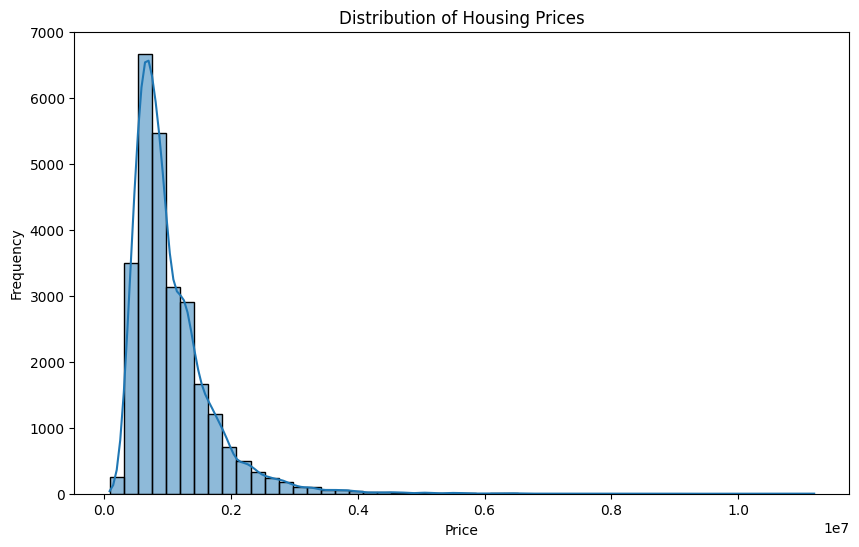

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'].dropna(), bins=50, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between the number of rooms and house prices.

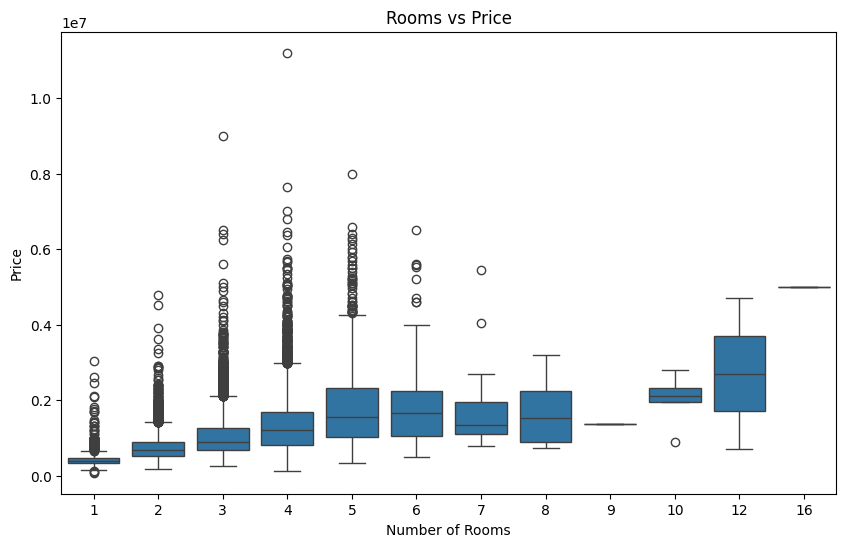

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=data)
plt.title('Rooms vs Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

# Visualize the relationship between land area and house prices.

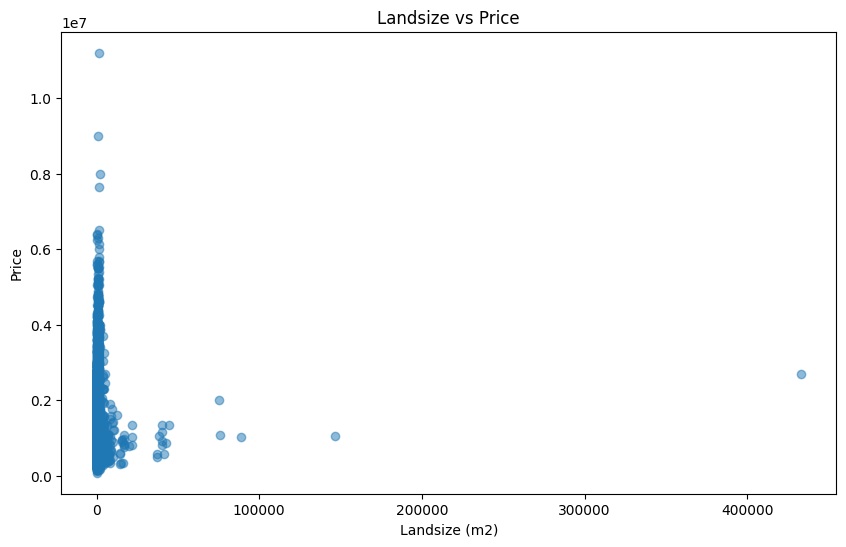

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Landsize'], data['Price'], alpha=0.5)
plt.title('Landsize vs Price')
plt.xlabel('Landsize (m2)')
plt.ylabel('Price')
plt.show()

# Heatmap showing the correlation between attributes.

<Figure size 1200x800 with 0 Axes>

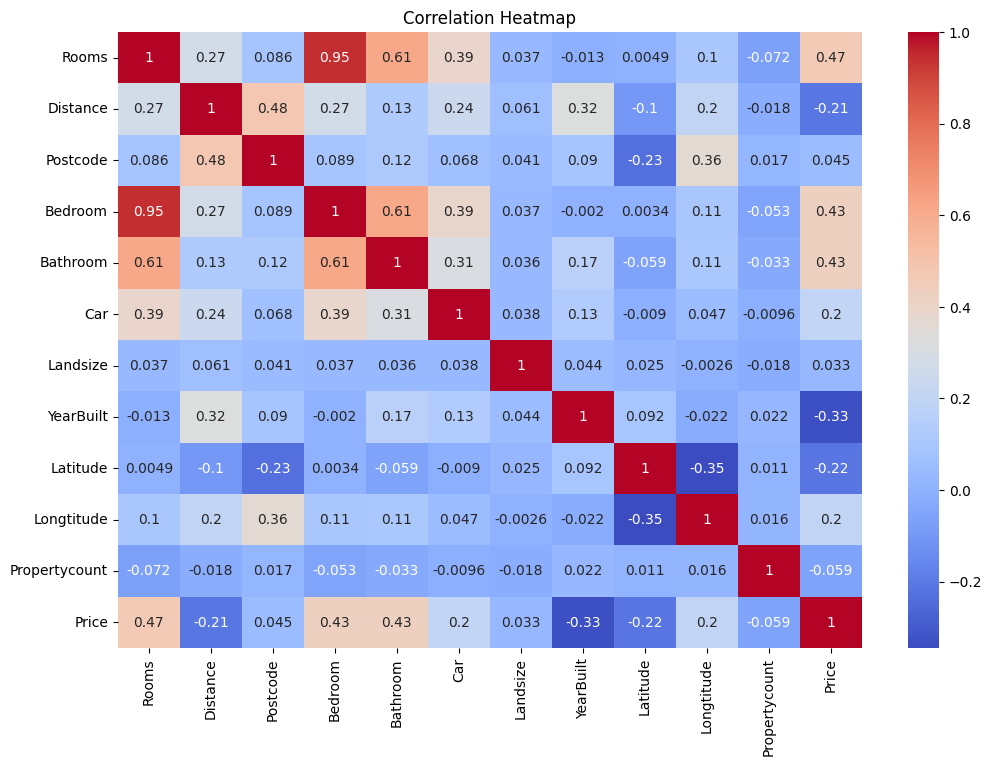

In [11]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualize the distribution of numerical attributes.

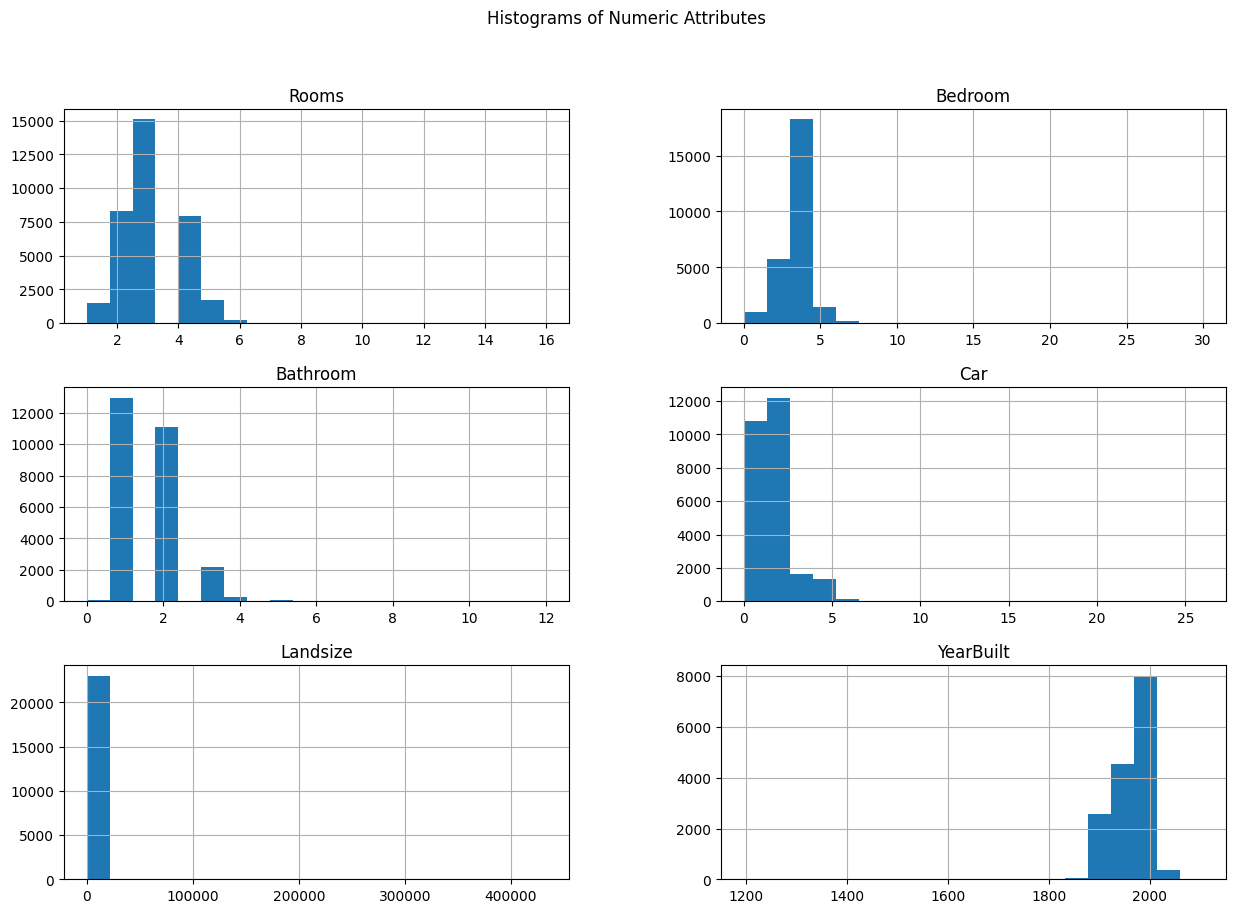

In [12]:
numeric_cols = ['Rooms', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
data[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numeric Attributes')
plt.show()

#   Examine the relationship between house type and house prices.


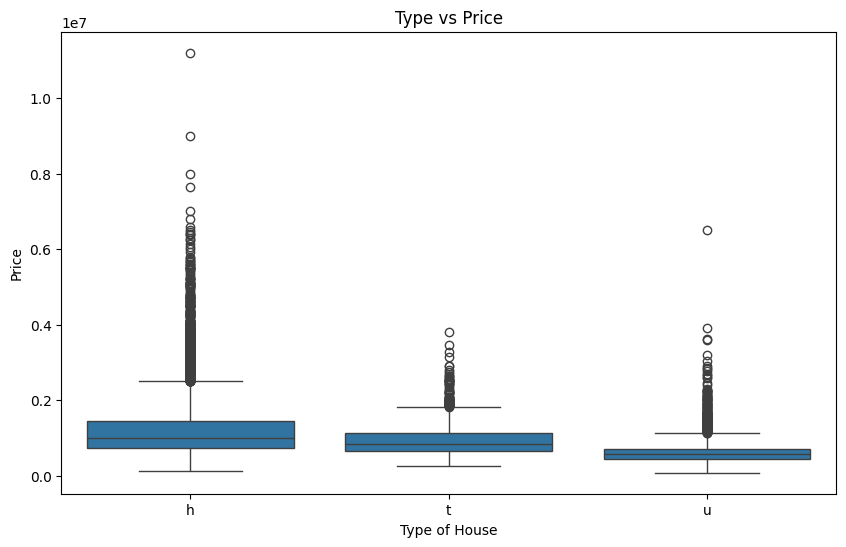

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=data)
plt.title('Type vs Price')
plt.xlabel('Type of House')
plt.ylabel('Price')
plt.show()

# Examine the relationship between sale method and house prices.


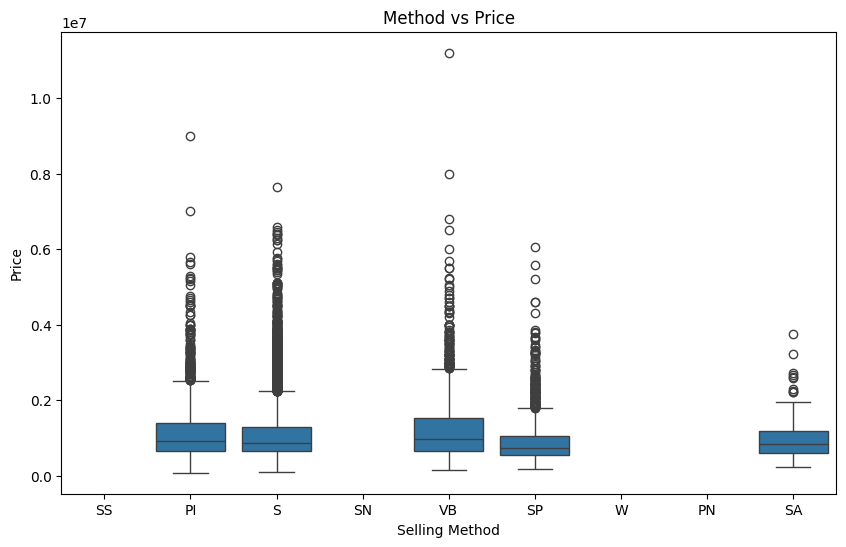

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='Price', data=data)
plt.title('Method vs Price')
plt.xlabel('Selling Method')
plt.ylabel('Price')
plt.show()


# Examine the relationship between region and house prices.


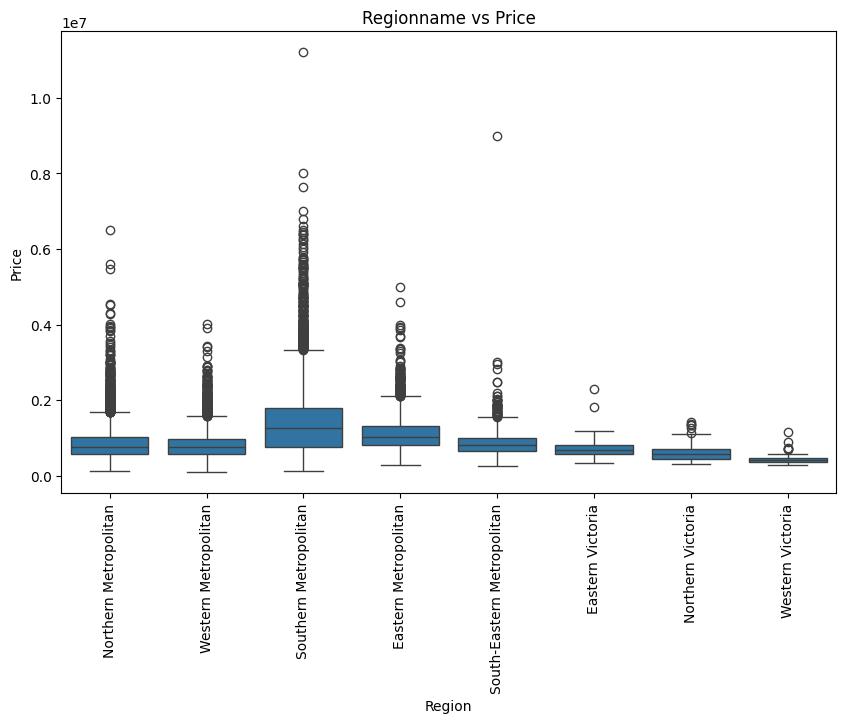

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Regionname', y='Price', data=data)
plt.title('Regionname vs Price')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


# Check the number of houses in each region.


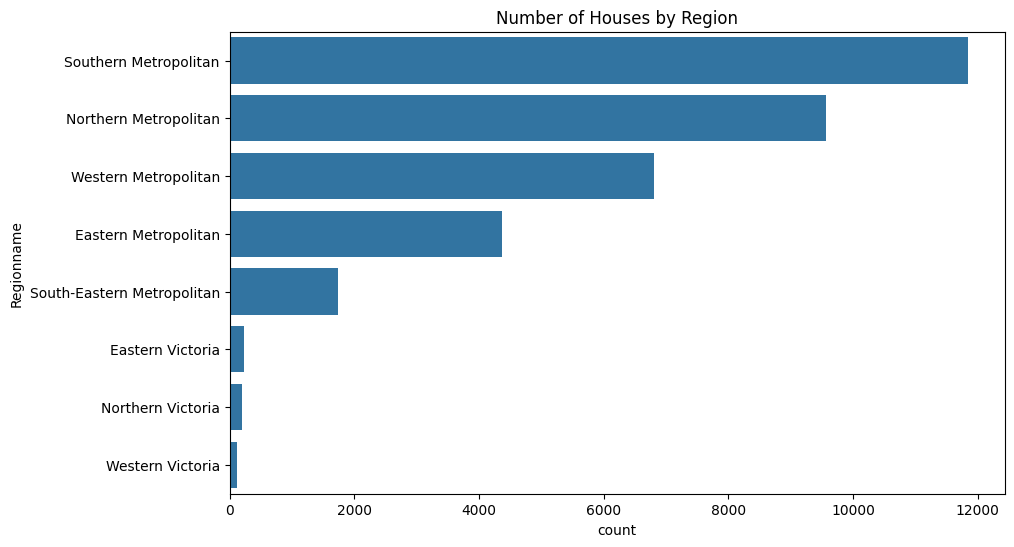

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Regionname', data=data, order=data['Regionname'].value_counts().index)
plt.title('Number of Houses by Region')
plt.show()

# Examine the relationship between the distance to the city center and house prices.


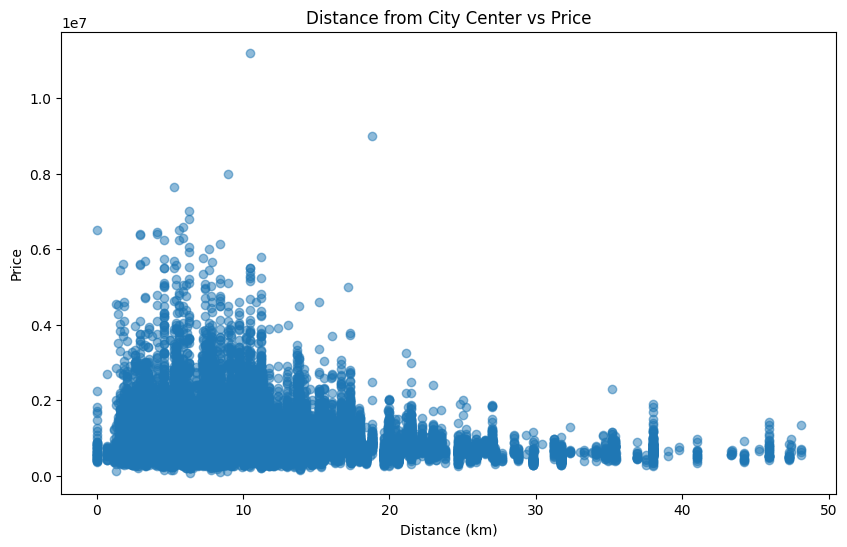

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Distance'], data['Price'], alpha=0.5)
plt.title('Distance from City Center vs Price')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.show()

# Examine the relationship between the number of bedrooms and house prices.


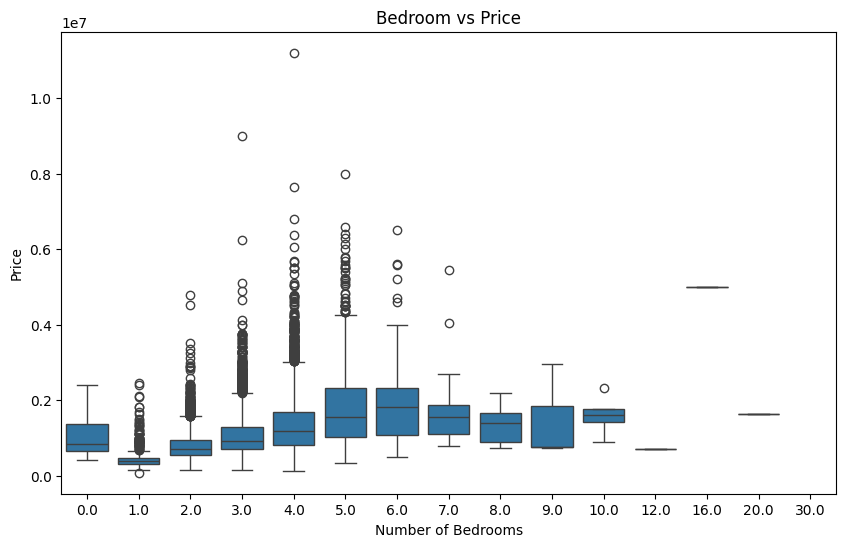

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedroom', y='Price', data=data)
plt.title('Bedroom vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()
